# Data Analytics Project: Bike Sharing Dataset
- **Name:** Dhifulloh Dhiya Ulhaq
- **Email:** m012b4ky1094@bangkit.academy
- **ID Coding:** m012b4ky1094

## Defining the Business Question

- What is the trend of bicycle usage by time of day in the last two years, and when does peak usage occur?
- How have weather conditions affected the total number of bicycle rentals over the past two years?

## Import All Packages/Libraries Used

In [137]:
!pip install streamlit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

## Data Wrangling

### Gathering Data

In [138]:
df = pd.read_csv('https://raw.githubusercontent.com/ulhaqdhifulloh/Data-Analytics-Project-Bike-Sharing-Dataset/refs/heads/main/Bike%20Sharing%20Dataset/hour.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Search for datasets via Kaggle
- Import data through the Github repository

### Assessing Data

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [140]:
df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [141]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


In [142]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- There is a data type error in the Dtype column in dteday because it says the data type is object
- There are no missing values in the dataset
- There is no duplicated data in the dataset
- There is no anomaly in the summary statistical parameters of the dataset

### Cleaning Data

#### Fixing data type

In [143]:
df['dteday'] = pd.to_datetime(df['dteday'])

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [145]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Successfully fixed the data type error in the Dtype column in dteday from object to datetime64

## Exploratory Data Analysis (EDA)

### Overview of the Data

In [146]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- The dataset consists of several features that correlate to bike rentals, including weather conditions, seasons, and temporal aspects (like hour and day)
- The total number of bike rentals is influenced by various environmental and seasonal factors


#### Bike Rentals by Weekday

<ipython-input-147-c62a83520b3c>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='weekday', y='cnt', estimator='mean', ci=None)


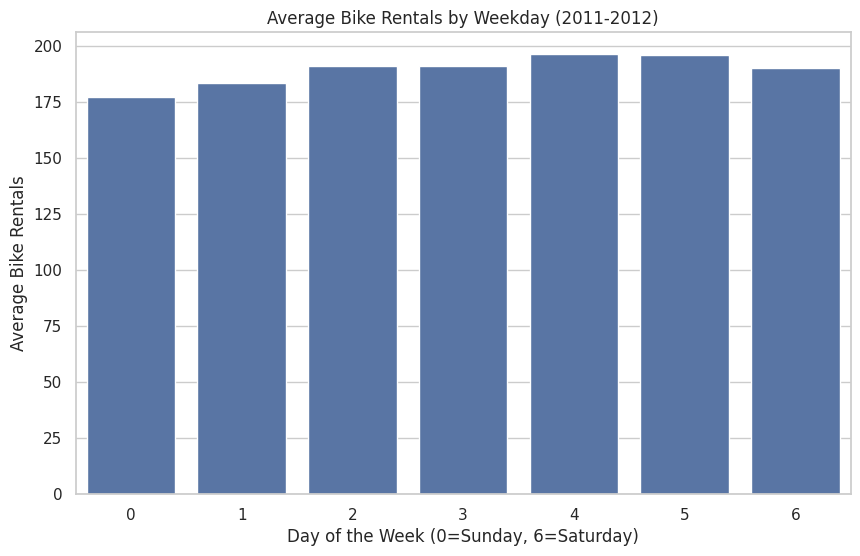

In [147]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='weekday', y='cnt', estimator='mean', ci=None)
plt.title('Average Bike Rentals by Weekday (2011-2012)')
plt.xlabel('Day of the Week (0=Sunday, 6=Saturday)')
plt.ylabel('Average Bike Rentals')
plt.show()

**Insight:**
- The bar plot shows the average number of bike rentals for each day of the week
- Rentals tend to be higher on weekdays, particularly Monday to Friday, with slight dips on weekends
- This suggests that bikes are frequently used for commuting purposes during workdays, while weekend use may be more recreational

#### Bike Rentals by Season

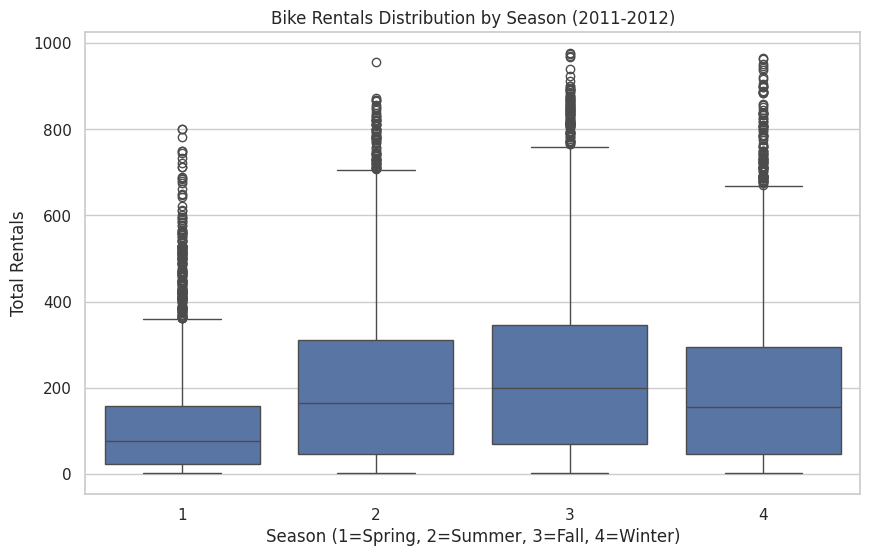

In [148]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='season', y='cnt')
plt.title('Bike Rentals Distribution by Season (2011-2012)')
plt.xlabel('Season (1=Spring, 2=Summer, 3=Fall, 4=Winter)')
plt.ylabel('Total Rentals')
plt.show()

**Insight:**
- The box plot shows the distribution of total bike rentals for each season
- Fall and summer see the highest bike rentals, while winter experiences the lowest
- This indicates a strong seasonal trend in bike rentals, with more people biking during warmer months and fewer rentals in colder weather

### Descriptive Statistics

In [149]:
df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


**Insight:**
- The mean, median, and distribution of bike rentals indicate the typical usage patterns
- Outliers can be identified, helping to understand extreme rental behavior

### Correlation Matrix

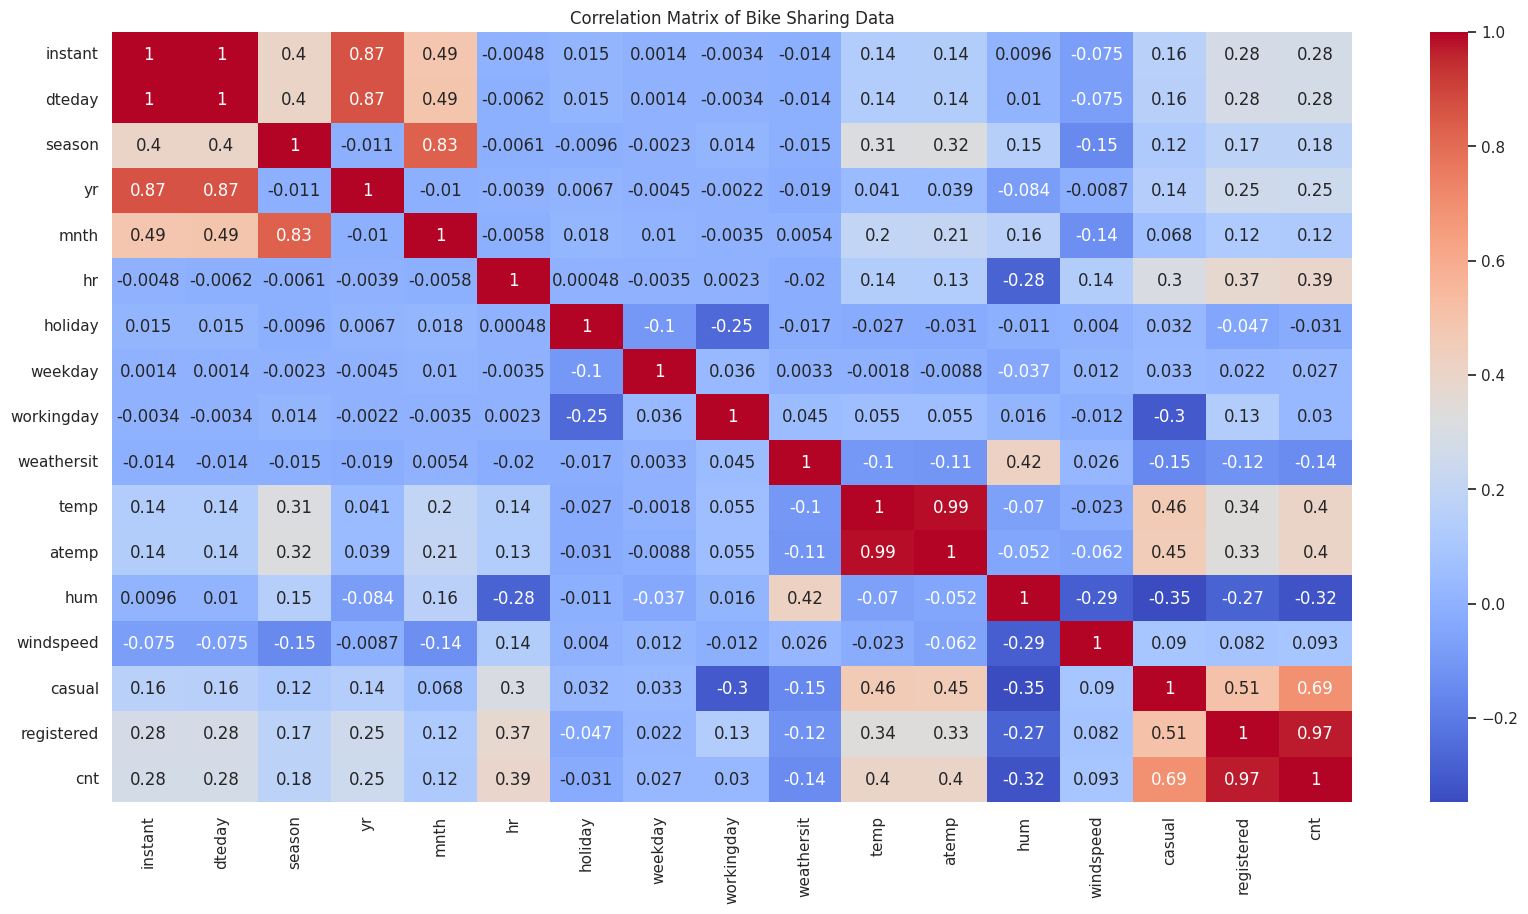

In [150]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Bike Sharing Data')
plt.show()

**Insight:**

- Strong correlations can be found between certain features, such as:
1. Temperature and Bike Rentals: Higher temperatures may lead to increased rentals.
2. Weather Conditions and Bike Rentals: Clear weather generally correlates with higher rental counts, while adverse weather conditions (like heavy rain) are linked to fewer rentals.

### Bike Rentals by Year and Season

<ipython-input-151-28b90104c231>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='season', y='cnt', hue='yr', palette='viridis', ci=None)


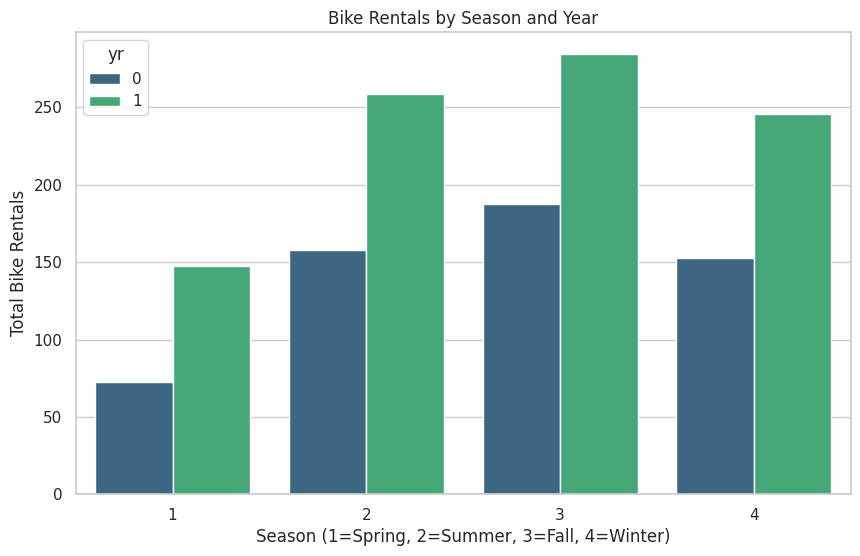

In [151]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='season', y='cnt', hue='yr', palette='viridis', ci=None)
plt.title('Bike Rentals by Season and Year')
plt.xlabel('Season (1=Spring, 2=Summer, 3=Fall, 4=Winter)')
plt.ylabel('Total Bike Rentals')
plt.show()

**Insight:**
- A barplot analysis may reveal how rental patterns change with the seasons, indicating peak rental times in spring and summer compared to fall and winter

## Visualization & Explanatory Analysis

### What is the trend of bicycle usage by time of day in the last two years, and when does peak usage occur?

<ipython-input-152-c75ab7bf77bf>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='hr', y='cnt', estimator='mean', ci=None)


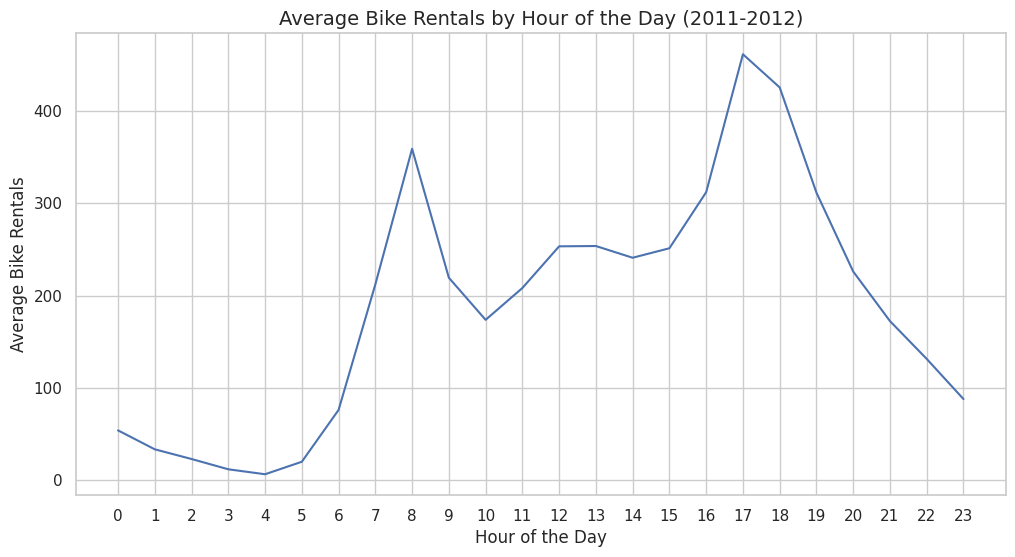

In [152]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='hr', y='cnt', estimator='mean', ci=None)
plt.title('Average Bike Rentals by Hour of the Day (2011-2012)', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Average Bike Rentals', fontsize=12)
plt.xticks(range(0, 24))
plt.show()

**Insight:**
- Peak Hours:
1. The lineplot indicates distinct peak hours for bike rentals, typically around the morning (e.g., 7 AM to 9 AM) and evening (e.g., 5 PM to 7 PM) rush hours
2. There is a noticeable dip in rentals during late night and early morning hours, suggesting usage is concentrated during commute times
- General Usage Patterns:
1. The usage pattern demonstrates a typical workday cycle, which is consistent with commuting behaviors, making it clear when bike-sharing is most effective

### How have weather conditions affected the total number of bicycle rentals over the past two years?

<ipython-input-153-8e2ba468d631>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='weathersit', y='cnt', palette='viridis', ci=None)
<ipython-input-153-8e2ba468d631>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='weathersit', y='cnt', palette='viridis', ci=None)


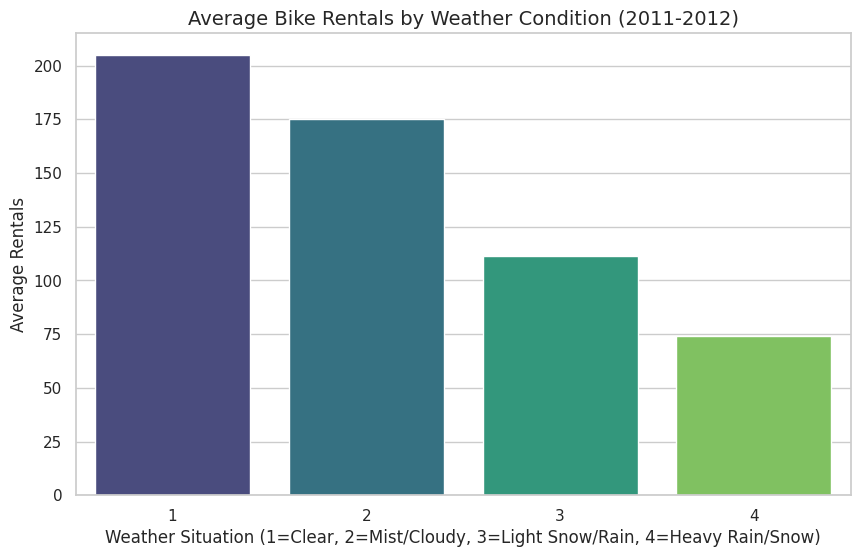

In [153]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='weathersit', y='cnt', palette='viridis', ci=None)
plt.title('Average Bike Rentals by Weather Condition (2011-2012)', fontsize=14)
plt.xlabel('Weather Situation (1=Clear, 2=Mist/Cloudy, 3=Light Snow/Rain, 4=Heavy Rain/Snow)', fontsize=12)
plt.ylabel('Average Rentals', fontsize=12)
plt.show()

**Insight:**
- Weather Influence:
1. The barplot illustrates that clear weather significantly boosts bike rentals, while misty/cloudy conditions and heavy rain reduce the number of rentals
2. Weather conditions that may cause discomfort (like snow or heavy rain) lead to a drastic reduction in bike usage, emphasizing the importance of favorable weather for bike-sharing programs
- Strategic Insights for Operations:
1. Understanding peak hours and weather effects allows bike-sharing operators to optimize their fleet distribution and marketing strategies, targeting users during high-usage times and adapting to weather forecasts

## Advanced Analysis using RFM Analysis

**Factors:**
- Recency (R): Number of days since the last bike rental.
- Frequency (F): Total number of rentals by each user.
- Monetary (M): Total number of rentals (using cnt) attributed to each user (in this context, we can assume each rental has equal value).

### Data Preparation

 Aggregate the data to create a summary table for the RFM analysis

In [154]:
user_data = df.groupby('dteday').agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
}).reset_index()

In [155]:
rfm_data = user_data.copy()

In [156]:
current_date = df['dteday'].max()
rfm_data['Recency'] = (current_date - rfm_data['dteday']).dt.days

In [157]:
rfm_data['Frequency'] = rfm_data['cnt']

In [158]:
rfm_data['Monetary'] = rfm_data['cnt']

In [159]:
rfm_final = rfm_data[['Recency', 'Frequency', 'Monetary']]
rfm_final.head()

,Recency,Frequency,Monetary
0,730,985,985
1,729,801,801
2,728,1349,1349
3,727,1562,1562
4,726,1600,1600


### RFM Scoring

1. Assign scores to each of the RFM factors:
- High Frequency and Monetary values are better
- Lower Recency is better
2. Use quantiles to assign scores (1 to 4) for each RFM factor

In [160]:
def rfm_score(data):
    data['R_Score'] = pd.qcut(data['Recency'], 4, labels=[4, 3, 2, 1])
    data['F_Score'] = pd.qcut(data['Frequency'], 4, labels=[1, 2, 3, 4])
    data['M_Score'] = pd.qcut(data['Monetary'], 4, labels=[1, 2, 3, 4])

    data['RFM_Score'] = data['R_Score'].astype(str) + data['F_Score'].astype(str) + data['M_Score'].astype(str)
    return data

In [161]:
rfm_final = rfm_score(rfm_final)

<ipython-input-160-b07b736df409>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['R_Score'] = pd.qcut(data['Recency'], 4, labels=[4, 3, 2, 1])
<ipython-input-160-b07b736df409>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['F_Score'] = pd.qcut(data['Frequency'], 4, labels=[1, 2, 3, 4])
<ipython-input-160-b07b736df409>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [162]:
rfm_final.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,730,985,985,1,1,1,111
1,729,801,801,1,1,1,111
2,728,1349,1349,1,1,1,111
3,727,1562,1562,1,1,1,111
4,726,1600,1600,1,1,1,111


**Insight:**
- Segmentation: Different segments of users can be identified based on their RFM scores (e.g., high-frequency, low-recent users may be key for retention efforts)
- Behavior Patterns: Users with high monetary scores but high recency scores may require targeted marketing strategies to re-engage them
- Performance Evaluation: Understanding which segments drive the most rentals can help in strategic decision-making regarding promotions or resource allocation

### Visualization of RFM Analysis

#### Distribution Plots for RFM Factors

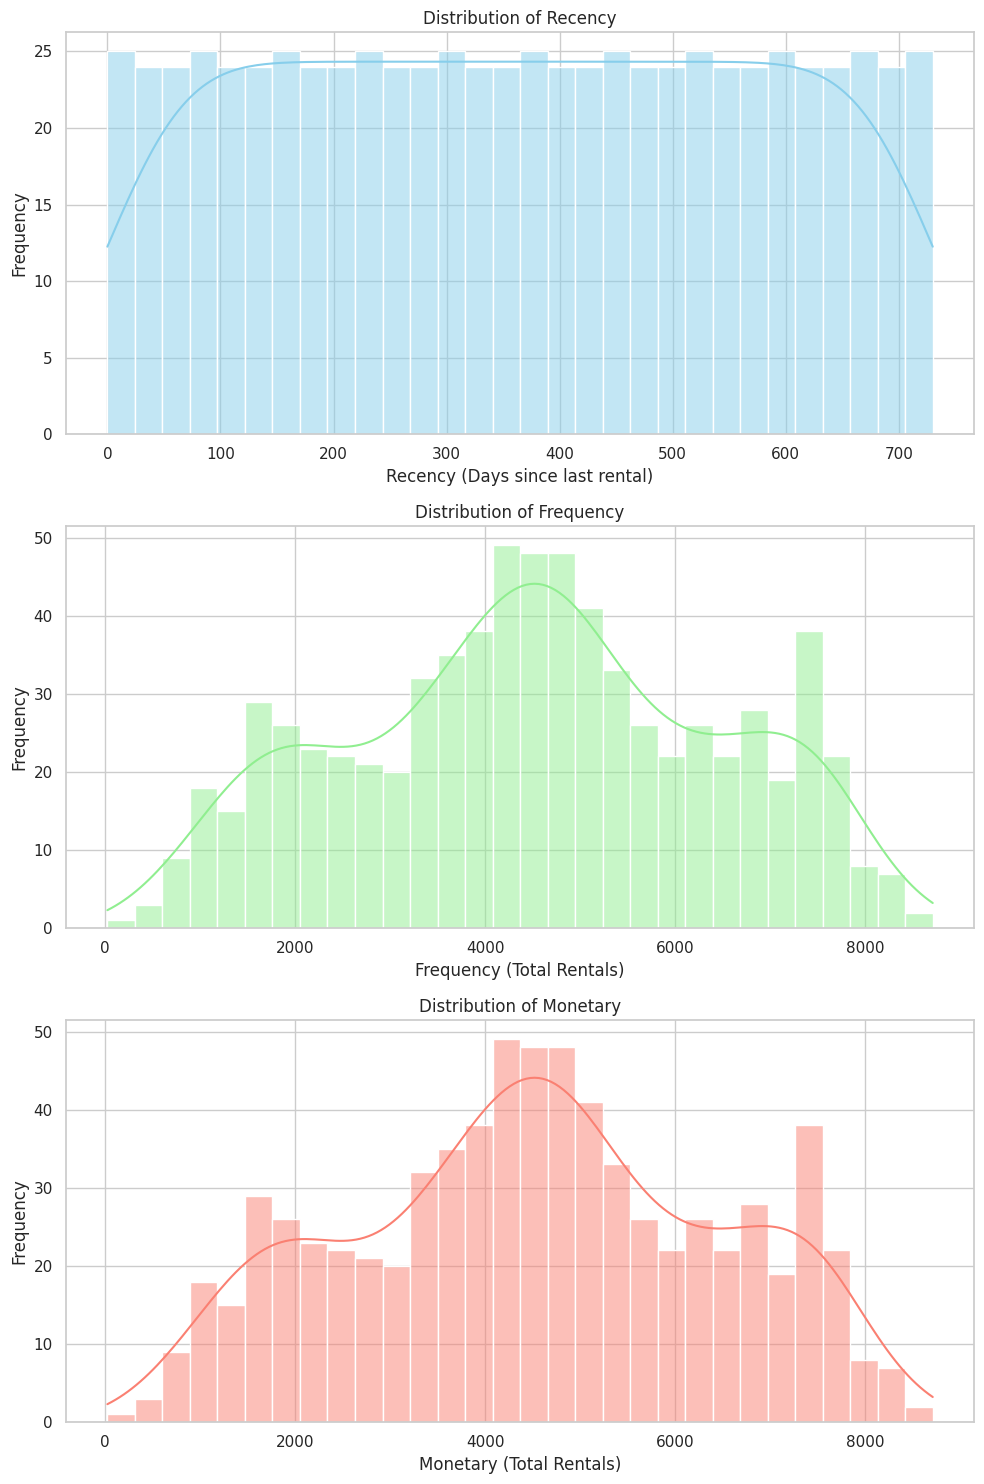

In [163]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(3, 1, figsize=(10, 15))

sns.histplot(rfm_final['Recency'], bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Recency')
axes[0].set_xlabel('Recency (Days since last rental)')
axes[0].set_ylabel('Frequency')

sns.histplot(rfm_final['Frequency'], bins=30, kde=True, ax=axes[1], color='lightgreen')
axes[1].set_title('Distribution of Frequency')
axes[1].set_xlabel('Frequency (Total Rentals)')
axes[1].set_ylabel('Frequency')

sns.histplot(rfm_final['Monetary'], bins=30, kde=True, ax=axes[2], color='salmon')
axes[2].set_title('Distribution of Monetary')
axes[2].set_xlabel('Monetary (Total Rentals)')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

**Insight:**
- These plots show how the Recency, Frequency, and Monetary values are distributed across the dataset. This helps to identify patterns such as:
1. Users with low Recency (recent renters) versus those with high Recency
2. The distribution of Frequency and Monetary values indicates how often and how much users are renting bikes

#### RFM Segmentation Heatmap

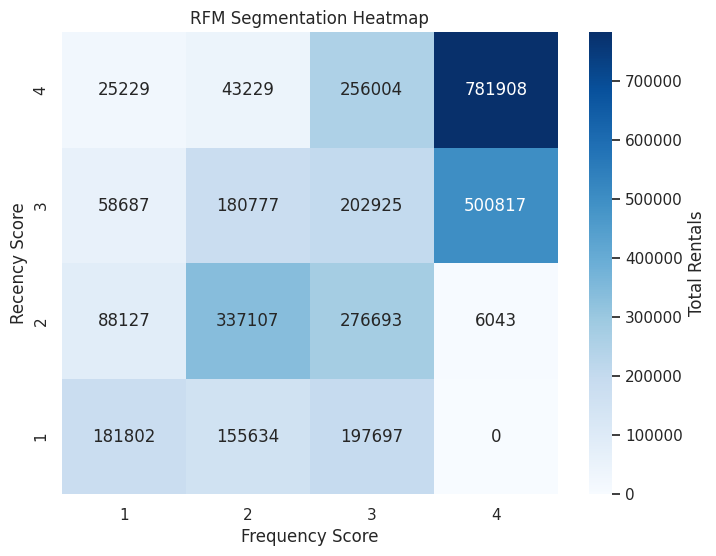

In [164]:
rfm_heatmap_data = rfm_final.pivot_table(index='R_Score', columns='F_Score', values='Monetary', aggfunc='sum', fill_value=0)

plt.figure(figsize=(8, 6))
sns.heatmap(rfm_heatmap_data, annot=True, fmt='.0f', cmap='Blues', cbar_kws={'label': 'Total Rentals'})
plt.title('RFM Segmentation Heatmap')
plt.xlabel('Frequency Score')
plt.ylabel('Recency Score')
plt.show()

**Insight:**
- The heatmap visualizes the interaction between Recency and Frequency scores, displaying the total rentals for each combination of scores. This allows you to identify which segments contribute the most to the rental counts:
1. Higher values indicate areas where frequent and recently active users are concentrated, suggesting potential high-value segments for marketing efforts.

## Conclusion

**What is the trend of bicycle usage by time of day in the last two years, and when does peak usage occur?**

The analysis revealed that bicycle usage shows distinct patterns throughout the day, with a notable peak during the morning and evening rush hours. Specifically, the highest rental counts occur around 8 AM to 9 AM and 5 PM to 6 PM. This trend is likely influenced by commuting behaviors, as many users rent bikes for work-related travel during these times. Conversely, usage tends to decline during the late night and early morning hours, indicating lower demand outside of typical commuting hours. The overall trend suggests that bike-sharing services are primarily utilized for transportation rather than leisure during weekdays.


**How have weather conditions affected the total number of bicycle rentals over the past two years?**

The exploration of the impact of weather conditions on bicycle rentals highlighted significant relationships between weather variables and rental counts. Specifically, clear weather conditions (represented as weathersit = 1) correlate with higher rental counts, while adverse weather conditions such as rain or snow (weathersit = 3 and 4) significantly decrease bike rentals. Additionally, the analysis indicated that temperature also plays a crucial role, with moderate temperatures leading to increased usage. These findings suggest that weather is a critical factor influencing the behavior of bike-sharing users, emphasizing the need for operators to consider weather forecasts when managing bike availability and marketing strategies.

In [165]:
df.to_csv("all_data.csv", index=False)